In [1]:
%pylab inline
from clawpack.pyclaw import Solution
import os
import pygmt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy

Populating the interactive namespace from numpy and matplotlib


In [2]:
def read_fortq(frame):
    """
    Import fort.q files to get x,y,z data
    """
    fortq = Solution(frame, file_format='ascii')
    patch_dict = {}
    for stateno, state in enumerate(fortq.states):
        patch = state.patch
        level = patch.level
        Xc, Yc = state.grid.c_centers
        h = state.q[0,:,:]
        eta = state.q[3,:,:]
        drytol_default = 0.001
        water = np.copy(eta)
        idx = np.where((h<=drytol_default) & (h>=-drytol_default))
        water[idx] = 0
        
        # Save variables to dictionary
        long=Xc[:,0]
        lat = Yc[0]
        patch_dict[stateno] = {"lat": lat, 'long':long, 'eta':eta, 'amr_level':level}
        return patch_dict, water, h, Xc, Yc, eta

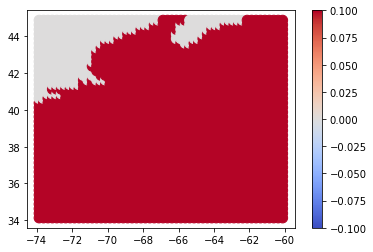

In [3]:
### Test plot of the data
for i in range(4,5):
    [patch_dict, water, h, X, Y, eta]=read_fortq(i)
    plt.figure()
    plt.scatter(X,Y,c=water,s=100,cmap=plt.get_cmap('coolwarm'))
    plt.clim(-0.1,0.1)
    plt.colorbar()
    plt.show()

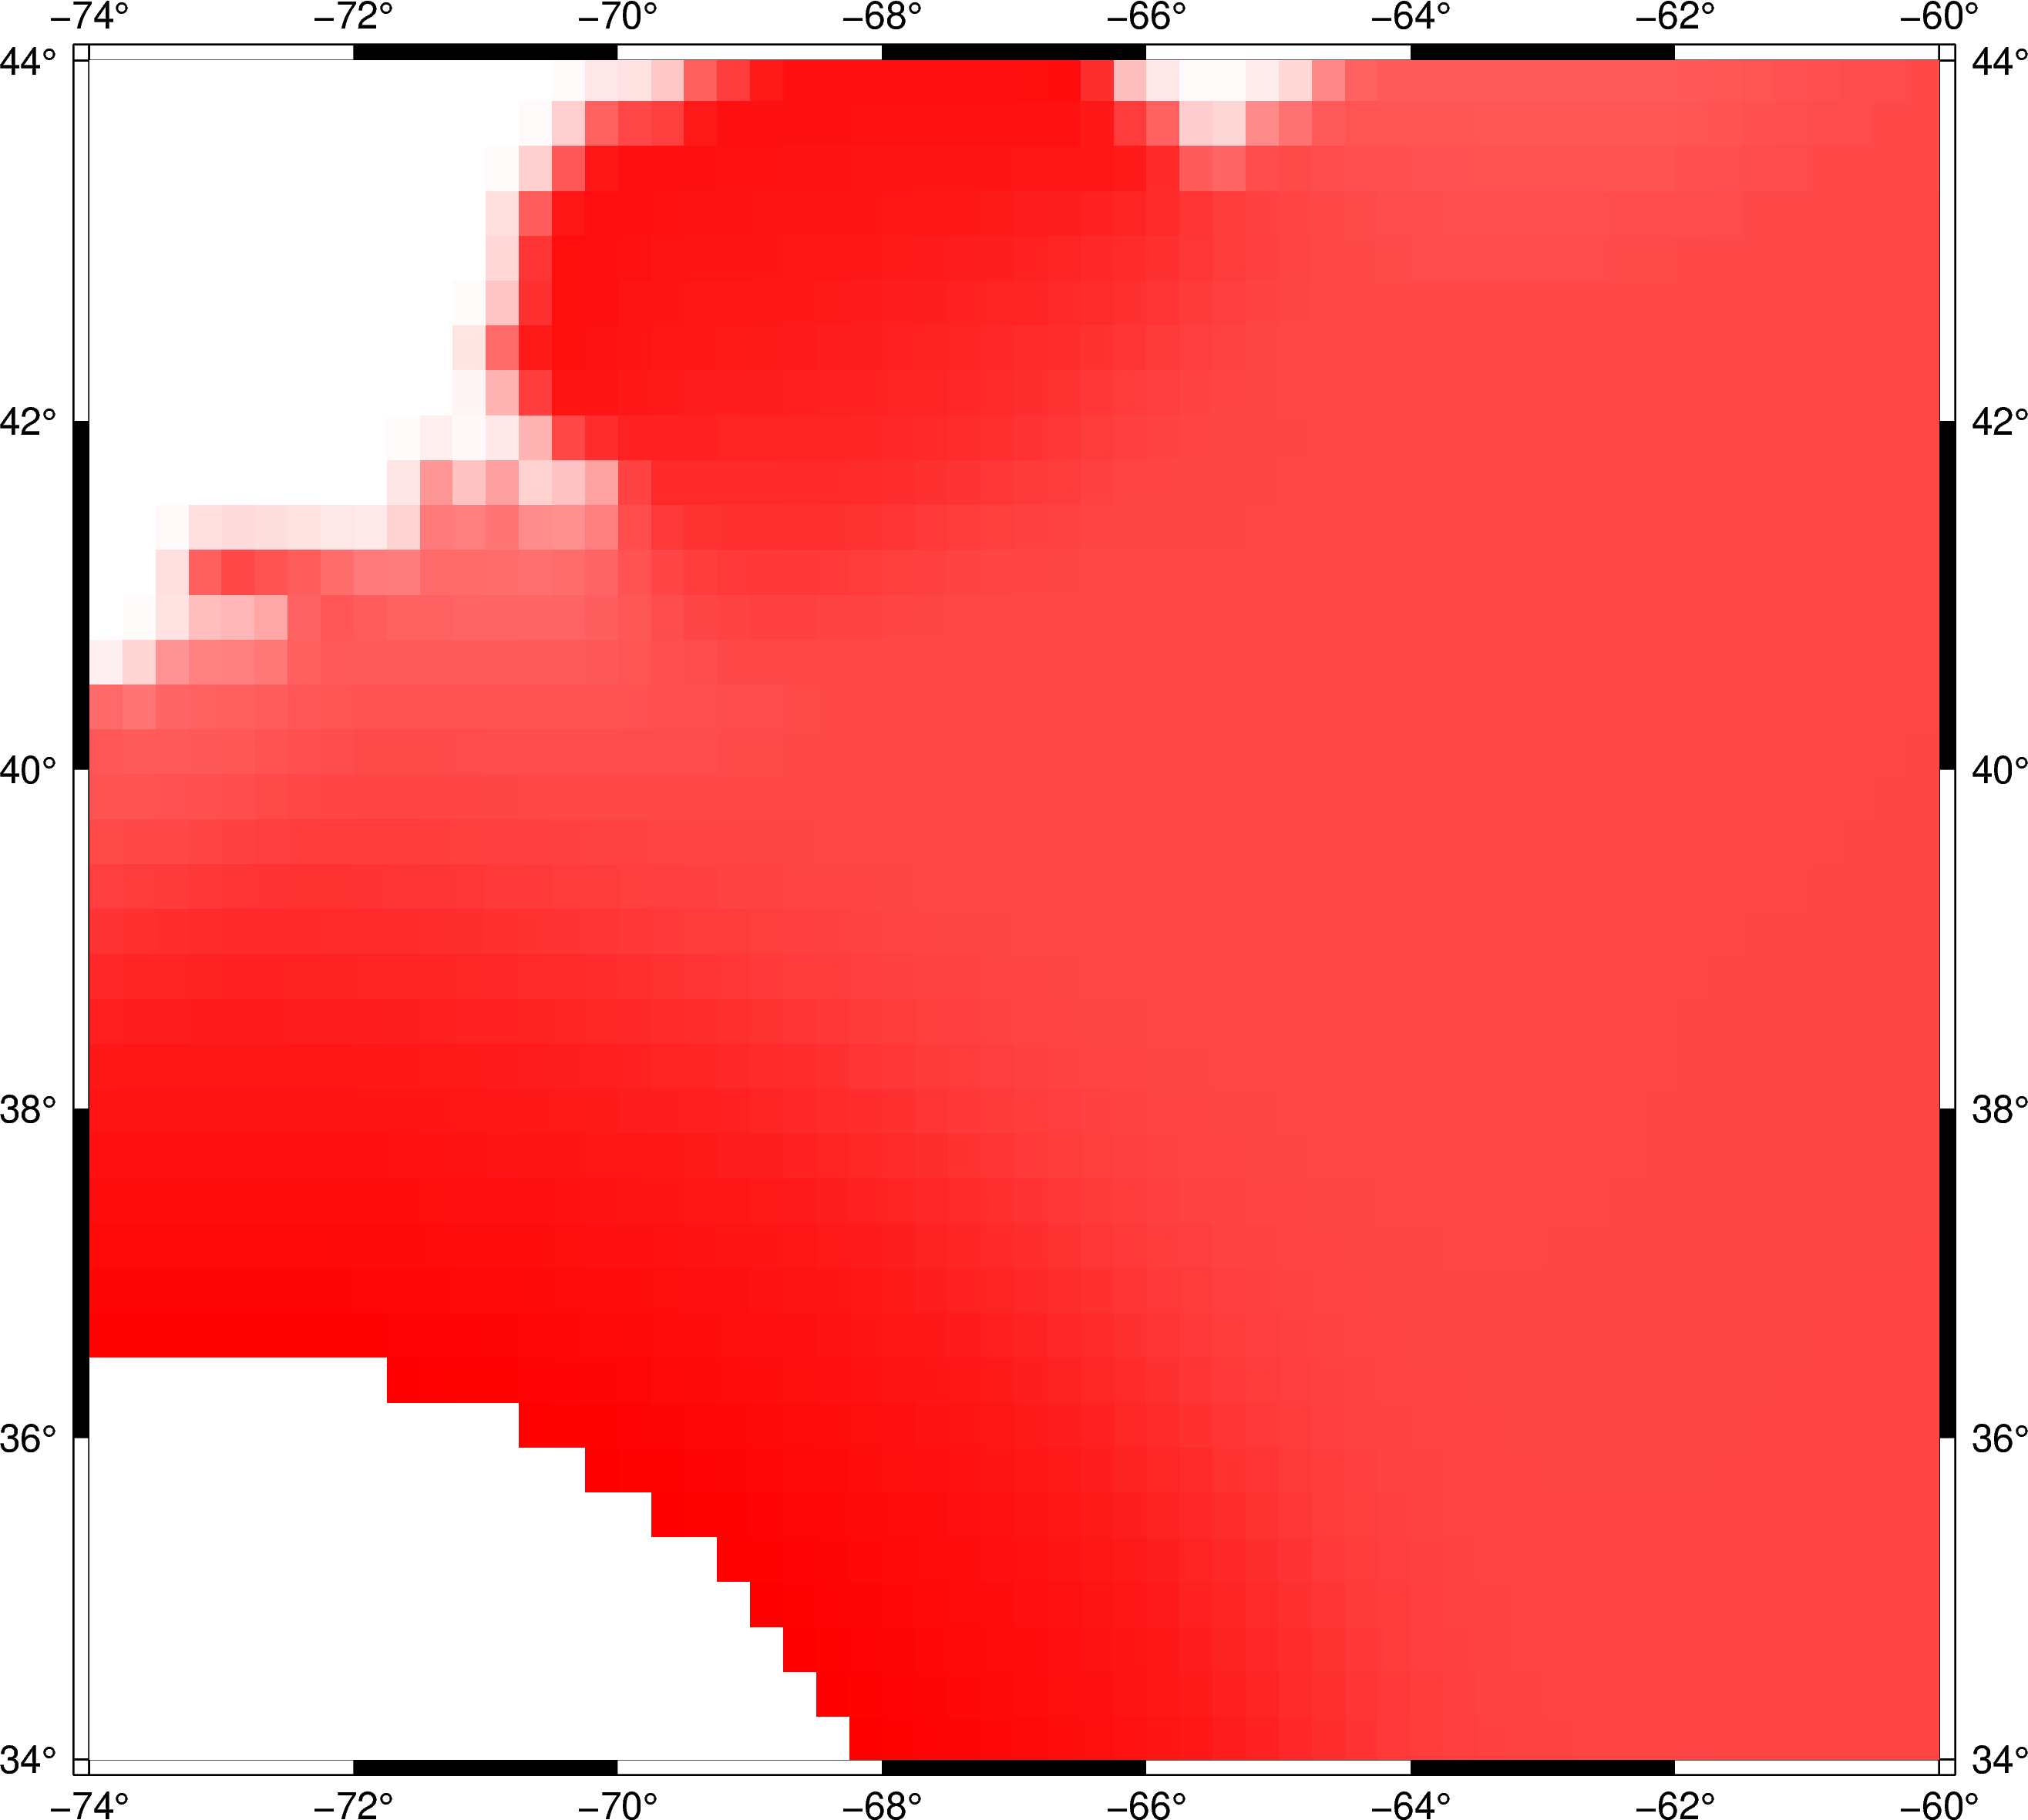

In [5]:
# def gmt_map(lat, lon, water):
[patch_dict, water, h, X, Y, eta]=read_fortq(4)
fig = pygmt.Figure()
fig.basemap(region=[-74.0, -60.00, 34., 44.], projection='M8i',frame='a')
pygmt.makecpt(series=[-.5, .5], cmap='polar')
x = X[:,0]
y = Y[0]
df = pd.DataFrame(data=water, index=[i for i in x], columns=[j for j in y])# 'Latitude':lat, 'Longitude':long})
df.index.name='Longitude'
df.columns.name="Latitude"
da=xr.DataArray(data=df.T)
# for patch in patch_dict:

#     lat = patch_dict[patch]['lat']

#     long = patch_dict[patch]['long']

#     eta = patch_dict[patch]['eta']
# #     print(patch, lat.min(), lat.max(), long.min(),long.max, eta.min(), eta.max())
#     df = pd.DataFrame(data=eta, index=[i for i in long], columns=[i for i in lat])# 'Latitude':lat, 'Longitude':long})
#     df.index.name='Longitude'
#     df.columns.name="Latitude"
#     da=xr.DataArray(data=df.T)

fig.grdimage(da, Q=True)
fig.show()
### Plot GMT map


# gmt_map(X, Y, water)
 

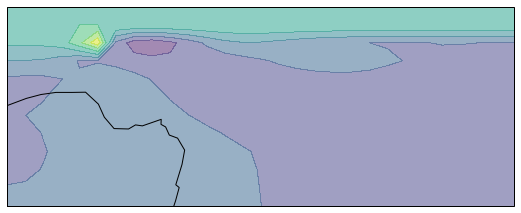

In [7]:
fig = plt.figure(figsize=[20,15])
ax = fig.add_subplot(121, projection=ccrs.PlateCarree([-99.0, -70.0, 20.0, 32.0]))


# ax.set_extent(img_extent)
ax.coastlines()

# ax.contourf(long, lat, eta)


# import numpy as np
# lon = np.linspace(-80, 80, 25)
# lat = np.linspace(30, 70, 25)
# lon2d, lat2d = np.meshgrid(lon, lat)
# data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)
ax.contourf(da, alpha=0.5)
plt.show()

# fig = plt.figure(2)
# plt.pcolor(Xc, Yc, eta, vmin=-0.1, vmax=1.)